In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
"""
from scipy.io import loadmat
x = loadmat(r"/content/drive/My Drive/Train_visual_saliency/Visual_Saliency_dataset/fixations/train/COCO_train2014_000000000510.mat")
"""

'\nfrom scipy.io import loadmat\nx = loadmat(r"/content/drive/My Drive/Train_visual_saliency/Visual_Saliency_dataset/fixations/train/COCO_train2014_000000000510.mat")\n'

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Input
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras
keras.backend.common.set_image_dim_ordering("th")
from keras.preprocessing.image import load_img
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.optimizers import SGD
import h5py
import numpy as np
import keras
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Activation
from keras.layers import Activation, BatchNormalization, Input
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.models import Model
from keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler
import pandas as pd

Using TensorFlow backend.


In [2]:

input_tensor = Input(shape=(3,240,320))
#model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)
model = VGG16(weights='imagenet')











553467904/553467096 [==============================] - 13s 0us/step


In [0]:
import glob

In [0]:
DATASET_FILE = r'/content/drive/My Drive/Train_visual_saliency/testing_data/*'
train_data = []
y_train = []
import cv2
for i in glob.glob(DATASET_FILE):
    for j in glob.glob(i +'/*.jpg'):
      x = cv2.imread(j)
      x = cv2.resize(x, (240, 240),interpolation=cv2.INTER_CUBIC)
      image_convert=np.swapaxes(np.swapaxes(x, 1, 2), 0, 1)
      img = preprocess_input(image_convert)
      train_data.append(img)
    for k in glob.glob(i +'/*.png'):
      y = cv2.imread(k,cv2.COLOR_BGR2GRAY)
      if y.shape != None:
        y = cv2.resize(y, (240, 240),interpolation=cv2.INTER_CUBIC)
        y = np.expand_dims(y, axis=1)
        image_convert=np.swapaxes(np.swapaxes(y, 0, 1), 1, 2)
        y_train.append(image_convert)
  
    

In [0]:
x_train = np.array(train_data)
y_train = np.array(y_train)

In [0]:
x_train.shape

(28, 3, 240, 240)

In [0]:
def norm_weights(n):
    r = n / 2.0
    xs = np.linspace(-r, r, n)
    x, y = np.meshgrid(xs, xs)
    w = np.exp(-0.5*(x**2 + y**2))
    w /= w.sum()
    return w

def deconv(nb_filter, size, name):
    upsample = UpSampling2D(size=(size, size))
    s = 2 * size + 1
    w = norm_weights(s)[np.newaxis, np.newaxis, :, :]
    conv = Convolution2D(
        nb_filter, s, s,
        name=name,
        activation='linear',
        bias=False,
        border_mode='same',
        weights=[w])
    return lambda x: conv(upsample(x))

In [0]:
def get_model():

    input_tensor = Input(shape=(3, 240, 240)) 
    base_model = VGG16(weights='imagenet', input_tensor=input_tensor)
    
    
    x = base_model.get_layer('block3_conv3').output
    x = Convolution2D(512, 5, 5, activation='relu', border_mode='same', name='conv4')(x)
    x = Convolution2D(512, 5, 5, activation='relu', border_mode='same', name='conv5')(x)
    x = Convolution2D(256, 7, 7, activation='relu', border_mode='same', name='conv6')(x)
    x = Convolution2D(128, 11, 11, activation='relu', border_mode='same', name='conv7')(x)
    x = Convolution2D(32 , 11, 11, activation='relu', border_mode='same', name='conv8')(x)
    x = Convolution2D(1 , 13, 13, activation='relu', border_mode='same', name='conv9')(x)
    x = UpSampling2D(size=(4, 4))(x)
    x = Convolution2D(1, 9, 9, name='deconv', bias=False, border_mode='same', activation='linear')(x)
    # x = deconv(1,4, 'deconv')(x)
    output = Activation('sigmoid')(x)
   
    model = Model(input=input_tensor, output=output)
    sgd = SGD(lr=1.3e-7)
    model.compile(optimizer=sgd, loss='binary_crossentropy')
    return model

In [4]:
model = get_model()




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 5), activation="relu", name="conv4", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 5), activation="relu", name="conv5", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (7, 7), activation="relu", name="conv6", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (11, 11), activation="relu", name="conv7", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3, 240, 240)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 240, 240)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 240, 240)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 120, 120)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 120, 120)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 120, 120)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 60, 60)       0   

In [0]:
from keras.utils import plot_model 

In [0]:
plot_model(model, to_file='model.png')

In [0]:
class PeriodicLR(object):
    """
    Learning rate schedule that periodically reduces
    """
    def __init__(self, base_lr, epochs, gamma):
        self.base_lr = base_lr
        self.epochs = epochs
        self.gamma = gamma

    def __call__(self, epoch):
        n = epoch / self.epochs
        return self.base_lr * (self.gamma ** n)

In [0]:
lr = 0.001
lr_scheduler = LearningRateScheduler(schedule = PeriodicLR(lr, 5, 0.5))
model.fit(
            x_train,
            y_train,
            batch_size=2 ,
            nb_epoch=20,
            shuffle="batch",
           )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
28/28 [==============================] - 9s 317ms/step - loss: 0.8943
Epoch 2/20
28/28 [==============================] - 9s 316ms/step - loss: 0.8843
Epoch 3/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8754
Epoch 4/20
28/28 [==============================] - 9s 315ms/step - loss: 0.8669
Epoch 5/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8588
Epoch 6/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8519
Epoch 7/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8451
Epoch 8/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8392
Epoch 9/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8343
Epoch 10/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8295
Epoch 11/20
28/28 [==============================] - 9s 314ms/step - loss: 0.8244
Epoch 12/20
28/28 [==============================] - 9s 315ms/step - loss: 0.8198
Epoch 13/20
28/28 [======

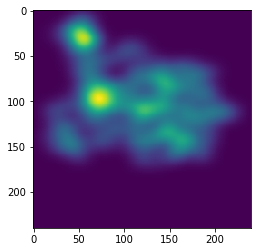

In [0]:
sal_map = y_train[2, 0, :, :]
plt.imshow(sal_map)

In [0]:
image_test = cv2.imread(r'/content/drive/My Drive/Train_visual_saliency/Visual_Saliency_dataset/images/images/train/COCO_train2014_000000578900.jpg')

In [0]:
image_test.shape

(480, 640, 3)

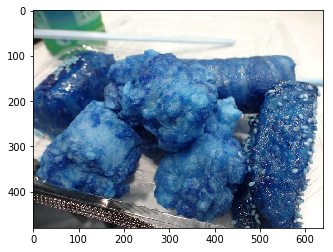

In [0]:
plt.imshow(image_test)

In [0]:
x = cv2.resize(image_test, (240, 240),interpolation=cv2.INTER_CUBIC)
image_convert=np.swapaxes(np.swapaxes(x, 1, 2), 0, 1)
img = preprocess_input(image_convert)

In [0]:
test = model.predict(a)

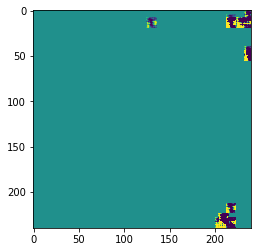

In [0]:
sal_map = test[0, 0, :, :]
plt.imshow(sal_map)